# Assignment: Visualization
### `! git clone https://github.com/ds3001f25/visualization_assignment.git`
### Do Q1 and Q2.

### Setup

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Q1 Stuff

**Q1.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use the pretrail data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform 
$$
k(z) = \begin{cases} 
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is 
$$
k(z) = \begin{cases} 
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

In [ ]:
def gaussian_kernel(arr, bw):
    return (1/(bw*np.sqrt(2*np.pi))) * np.exp(-0.5 * (arr/bw)**2)

def uniform_kernel(arr, bw):
    return (0.5/bw) * (np.abs(arr) <= 1)

def epanechnikov_kernel(arr, bw):
    # no fucking IDEA where the bandwidth goes in this one :/
    pass

def kde_plot(arr, bw=None, kernel='gaussian'):
    # if the user didn't specify a bandwidth, just use Silverman's
    if bw is None:
        sd = arr.std()
        N = len(arr)
        bw = 1.06 * sd * N**(-1/5) # this is Silverman's
    if kernel == 'gaussian':
        kernel = gaussian_kernel
    elif kernel == 'uniform':
        kernel = uniform_kernel
    elif kernel == 'epanechnikov':
        kernel = epanechnikov_kernel
    else: # classic error if the user puts something that makes no sense
        raise ValueError(f"Unknown kernel: {kernel}")
    pass

### Q2 Stuff

**Q2.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

#### Q2.1

In [36]:
college_df = pd.read_csv('./data/college_completion.csv')

#### Q2.2

In [37]:
college_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 63 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 3798 non-null   int64  
 1   unitid                                3798 non-null   int64  
 2   chronname                             3798 non-null   object 
 3   city                                  3798 non-null   object 
 4   state                                 3798 non-null   object 
 5   level                                 3798 non-null   object 
 6   control                               3798 non-null   object 
 7   basic                                 3798 non-null   object 
 8   hbcu                                  94 non-null     object 
 9   flagship                              50 non-null     object 
 10  long_x                                3798 non-null   float64
 11  lat_y            

In [38]:
college_df.shape

(3798, 63)

To answer each of the questions from earlier:
- What are are the dimensions of the data? 
  - 3798 rows, 63 columns
- How many observations are there?
  - 3798
- What are the variables included?
  - There's a lot so I won't list them all, but it primarily pertains to university information such as location, student count, and a bunch of award informational columns.

In [39]:
college_df.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


#### Q2.3

In [40]:
pd.crosstab(college_df['control'], college_df['level'])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


It seems like there are a roughly even number of private for-profit institutions for both 2-year and 4-year offerings, but there are drastically more private non-profit institutions that are 4-year than 2-year. Another pattern seems to be that there are a lot more 2-year public institutions than 4-year public institutions.

#### Q2.4

In [41]:
grad_100_val = college_df['grad_100_value']

Gonna use seaborn for the graphing because I think it looks prettier and it bothers me when I can't modify the axes name and title easily.

[Text(0.5, 1.0, 'Histogram of Expected Time Graduates'),
 Text(0.5, 0, 'Expected Time Graduates (%)'),
 Text(0, 0.5, 'Frequency')]

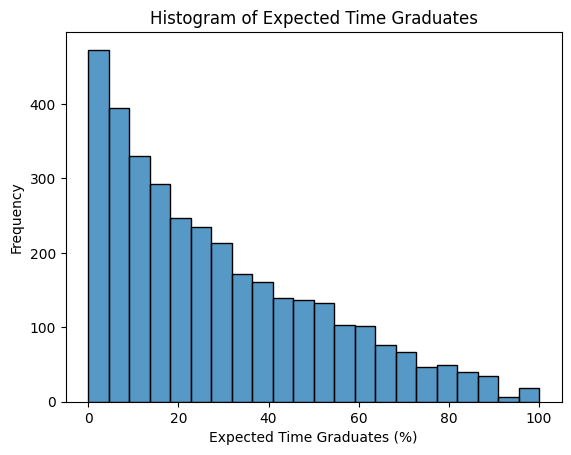

In [42]:
sns.histplot(grad_100_val).set(title='Histogram of Expected Time Graduates', xlabel='Expected Time Graduates (%)', ylabel='Frequency')

[Text(0.5, 1.0, 'KDE Plot of Expected Time Graduates'),
 Text(0.5, 0, 'Expected Time Graduates (%)'),
 Text(0, 0.5, 'Density')]

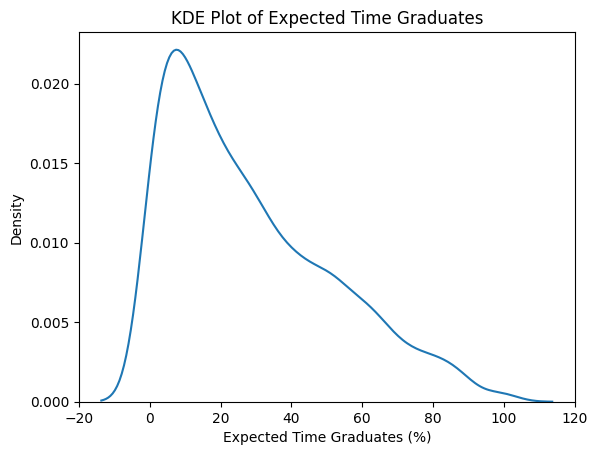

In [43]:
sns.kdeplot(grad_100_val).set(title='KDE Plot of Expected Time Graduates', xlabel='Expected Time Graduates (%)', ylabel='Density')

[Text(0.5, 1.0, 'Boxplot of Expected Time Graduates'),
 Text(0, 0.5, 'Expected Time Graduates (%)')]

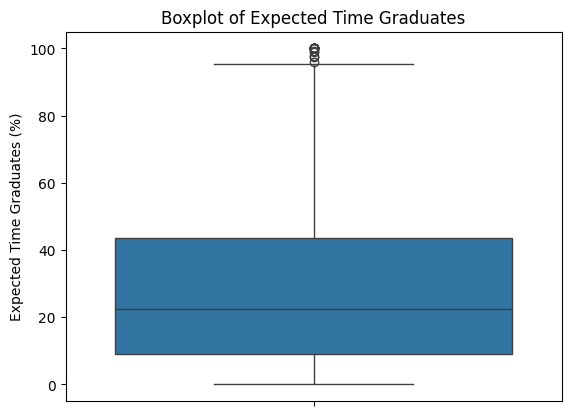

In [44]:
sns.boxplot(grad_100_val).set(title='Boxplot of Expected Time Graduates', ylabel='Expected Time Graduates (%)')

In [45]:
grad_100_val.describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

#### Q2.5

[Text(0.5, 1.0, 'KDE Plot of Expected Time Graduates by Institution Level'),
 Text(0.5, 0, 'Expected Time Graduates (%)'),
 Text(0, 0.5, 'Density')]

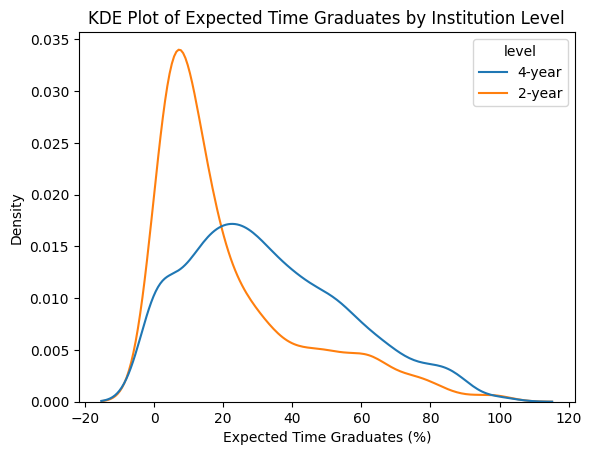

In [65]:
sns.kdeplot(x=grad_100_val, hue=college_df['level'], common_norm=False).set(title='KDE Plot of Expected Time Graduates by Institution Level', xlabel='Expected Time Graduates (%)', ylabel='Density')

[Text(0.5, 1.0, 'KDE Plot of Expected Time Graduates by Institution Profit Status'),
 Text(0.5, 0, 'Expected Time Graduates (%)'),
 Text(0, 0.5, 'Density')]

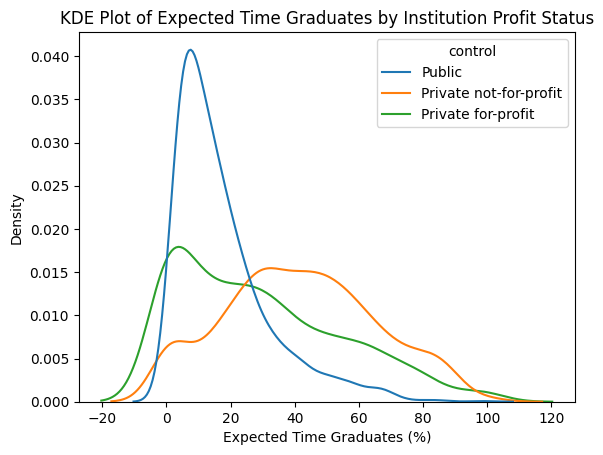

In [64]:
sns.kdeplot(x=grad_100_val, hue=college_df['control'], common_norm=False).set(title='KDE Plot of Expected Time Graduates by Institution Profit Status', xlabel='Expected Time Graduates (%)', ylabel='Density')

In [48]:
college_df.loc[:, ['control', 'level', 'grad_100_value']].groupby(['control', 'level']).describe()


grad_100_value                             \
                                       count       mean        std  min   
control                level                                              
Private for-profit     2-year          461.0  37.197614  25.497380  0.0   
                       4-year          318.0  17.382704  20.788525  0.0   
Private not-for-profit 2-year           68.0  41.913235  28.348302  0.0   
                       4-year         1121.0  41.645674  23.243453  0.0   
Public                 2-year          926.0  12.400000  10.893600  0.0   
                       4-year          573.0  25.561082  16.403902  0.0   

                                                            
                                  25%   50%     75%    max  
control                level                                
Private for-profit     2-year  15.800  33.9  57.800  100.0  
                       4-year   0.000  12.5  26.325  100.0  
Private not-for-profit 2-year  16.225  44.4  61.200  100.0  
                       4-year  25.000  41.0  57.800  100.0  
Public                 2-year   5.100   9.4  16.175   97.8  
                       4-year  13.600  21.8  33.800   86.3

Based on the means alone, it seems like private not-for-profit institutions (that are both 2 and 4 year) tend to have the highest graduation rates, which private for-profit 2-year institutions being close behind.

#### Q2.6

In [ ]:
modified_college_df = college_df.copy()
modified_college_df['levelXcontrol'] = modified_college_df['level'] + ', ' + modified_college_df['control']

[Text(0.5, 1.0, 'KDE Plot of Expected Time Graduates by Level & Control Pairs'),
 Text(0.5, 0, 'Expected Time Graduates (%)'),
 Text(0, 0.5, 'Density')]

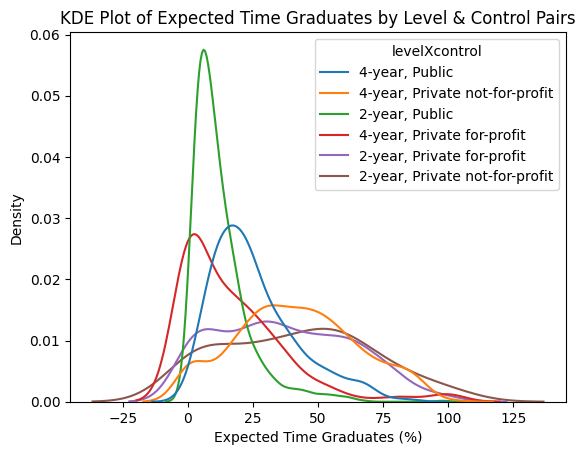

In [56]:
sns.kdeplot(x=modified_college_df['grad_100_value'], hue=modified_college_df['levelXcontrol'], common_norm=False).set(title='KDE Plot of Expected Time Graduates by Level & Control Pairs', xlabel='Expected Time Graduates (%)', ylabel='Density')

If I get amnesia and forget what I did in 2.5, just looking at this graph it seems like 4-year private not-for-profit institutions definitely have great graduation rates. Likewise, the 2-year private not-for-profit institutions also seem to have pretty solid graduation rates - even though their standard deviation looks like it would definitely be larger than the 4-year private not-for-profit institutions. Now if I regain my memories, this is consistent with the previous step's statistical description information. Great!

#### Q2.7

[Text(0.5, 1.0, 'KDE Plot of Average Aid by Institution Level and Profit Status'),
 Text(0.5, 0, 'Average Aid'),
 Text(0, 0.5, 'Density')]

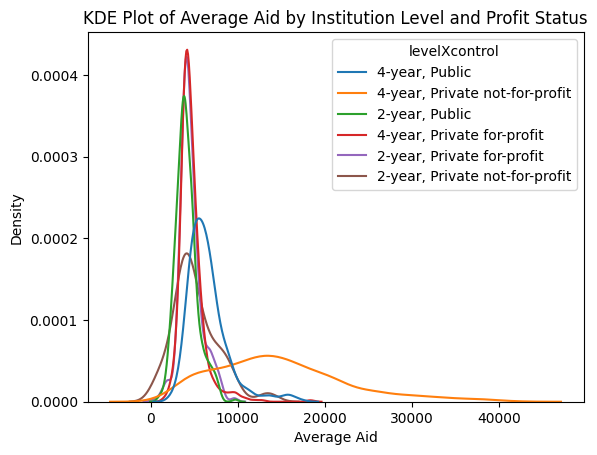

In [70]:
sns.kdeplot(x=modified_college_df['aid_value'], hue=modified_college_df['levelXcontrol'], common_norm=False).set(title='KDE Plot of Average Aid by Institution Level and Profit Status', xlabel='Average Aid', ylabel='Density')

This kind of makes a lot of sense. For 4-year vs 2-year institutions, it makes sense that 4-year institutions tend to give out more aid. I can think of two possible explanations. The first of which is that 2-year institutions tend to be cheaper and thus don't give out as much aid from what I know. Another resaon is that a lot of 4-year institutions stress trying to get people to complete their graduation programs, and thus may be more willing (or even more capable) of giving out more aid. For public and private for-profit institutions, the average aid is seemingly roughly similar - centered somewhere around 5,000, with a tail that extends higher (for students that need the financial aid). Private not-for-profit institutions though seem to give out a lot more aid, which makes a lot more sense because they are not for profit and likely have the goal to try to educate their students and give them the best chance possible - which includes covering them financially, hence being an explanation for the higher average aid in general.

In [66]:
modified_college_df.loc[:, ['control', 'level', 'aid_value']].groupby(['control', 'level']).describe()

aid_value                                     \
                                  count          mean          std     min   
control                level                                                 
Private for-profit     2-year     464.0   4559.681034  1286.688269   294.0   
                       4-year     527.0   4696.062619  1489.410020  1580.0   
Private not-for-profit 2-year      68.0   5128.058824  2590.449946   934.0   
                       4-year    1180.0  14702.401695  7649.775203   902.0   
Public                 2-year     926.0   4126.199784  1260.271382   881.0   
                       4-year     632.0   6514.071203  2353.716693  2232.0   

                                                                    
                                   25%      50%       75%      max  
control                level                                        
Private for-profit     2-year  3818.75   4286.5   5122.00   9727.0  
                       4-year  3885.50   4364.0   5131.50  18355.0  
Private not-for-profit 2-year  3650.00   4516.5   6311.50  13654.0  
                       4-year  9113.25  13774.5  18996.75  41580.0  
Public                 2-year  3311.25   3943.5   4762.00   9809.0  
                       4-year  4990.50   6085.0   7341.50  17299.0

And this description seems to affirm what I was thinking! private-not-for-profit in 4-year programs DRASTICALLY blows the other aid out of the water with it's mean (while obviously, having a massive standard deviation). The 4-year program for public institutions also has a higher average aid!

#### Q2.8

8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

[Text(0.5, 1.0, 'Scatterplot of Expected Time Graduates vs Average Aid'),
 Text(0.5, 0, 'Expected Time Graduates (%)'),
 Text(0, 0.5, 'Average Aid')]

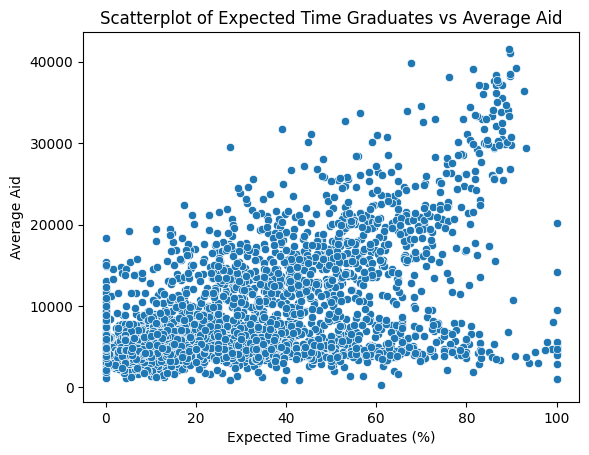

In [67]:
sns.scatterplot(x=modified_college_df['grad_100_value'], y=modified_college_df['aid_value']).set(title='Scatterplot of Expected Time Graduates vs Average Aid', xlabel='Expected Time Graduates (%)', ylabel='Average Aid')

I'm seeing a weak but existing trend where higher average aid has higher expected time graduation rates. Once we go higher than like 90% expected time graduates, that trend is gone and most of the observations have a lower average aid.

[Text(0.5, 1.0, 'Scatterplot of Expected Time Graduates vs Average Aid'),
 Text(0.5, 0, 'Expected Time Graduates (%)'),
 Text(0, 0.5, 'Average Aid')]

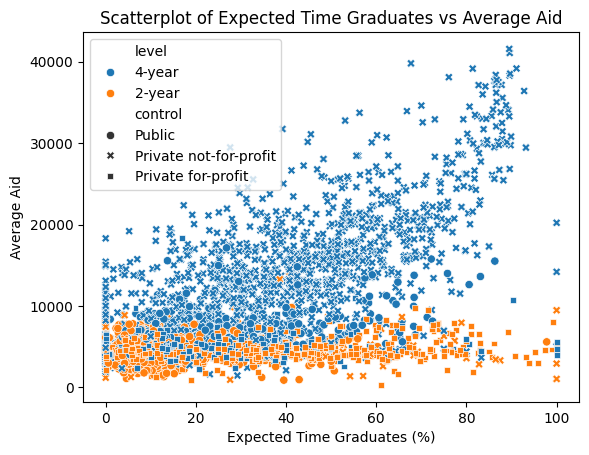

In [68]:
sns.scatterplot(x=modified_college_df['grad_100_value'], y=modified_college_df['aid_value'], hue=modified_college_df['level'], style=modified_college_df['control']).set(title='Scatterplot of Expected Time Graduates vs Average Aid', xlabel='Expected Time Graduates (%)', ylabel='Average Aid')

Based on this grouping, it is definitely evident that 4-year institutions seem to have that weak trend where higher average aid has higher expected time graduation rates. Furthermore, even though the grpah seems to be dominated by blue X's, it's undoubtedly true that a lot of the institutions that are part of this weak trend are 4-year institutions that are private not-for-profit. This makes a lot of sense!